## Dealing with NaN

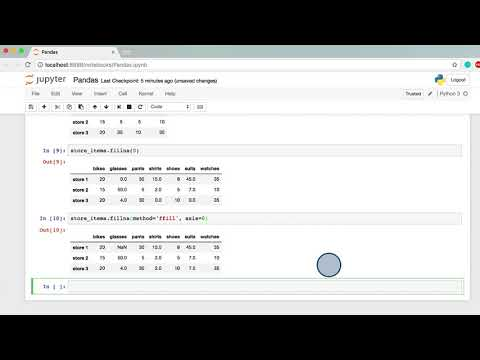

In [19]:
from IPython.display import YouTubeVideo
YouTubeVideo("GS1kj04XQcM",width="100%")

As mentioned earlier, before we can begin training our learning algorithms with large datasets, we usually need to clean the data first. This means we need to have a method for detecting and correcting errors in our data. While any given dataset can have many types of bad data, such as outliers or incorrect values, the type of bad data we encounter almost always is missing values. As we saw earlier, Pandas assigns NaN values to missing data. In this lesson we will learn how to detect and deal with NaN values.

We will begin by creating a DataFrame with some NaN values in it.

In [20]:
import pandas as pd

# We create a list of Python dictionaries
items2 = [{'bikes': 20, 'pants': 30, 'watches': 35, 'shirts': 15, 'shoes':8, 'suits':45},
{'watches': 10, 'glasses': 50, 'bikes': 15, 'pants':5, 'shirts': 2, 'shoes':5, 'suits':7},
{'bikes': 20, 'pants': 30, 'watches': 35, 'glasses': 4, 'shoes':10}]

# We create a DataFrame  and provide the row index
store_items = pd.DataFrame(items2, index = ['store 1', 'store 2', 'store 3'])

# We display the DataFrame
store_items

,bikes,glasses,pants,shirts,shoes,suits,watches
store 1,20,NaN,30,15.0,8,45.0,35
store 2,15,50.0,5,2.0,5,7.0,10
store 3,20,4.0,30,NaN,10,NaN,35


We can clearly see that the DataFrame we created has 3 NaN values: one in store 1 and two in store 3. However, in cases where we load very large datasets into a DataFrame, possibly with millions of items, the number of NaN values is not easily visualized. For these cases, we can use a combination of methods to count the number of NaN values in our data. The following example combines the .isnull() and the sum() methods to count the number of NaN values in our DataFrame

In [21]:
# We count the number of NaN values in store_items
x =  store_items.isnull().sum().sum()

# We print x
print('Number of NaN values in our DataFrame:', x)

Number of NaN values in our DataFrame: 3


In the above example, the .isnull() method returns a Boolean DataFrame of the same size as store_items and indicates with True the elements that have NaN values and with False the elements that are not. Let's see an example:

In [22]:
store_items.isnull()

,bikes,glasses,pants,shirts,shoes,suits,watches
store 1,False,True,False,False,False,False,False
store 2,False,False,False,False,False,False,False
store 3,False,False,False,True,False,True,False


In Pandas, logical True values have numerical value 1 and logical False values have numerical value 0. Therefore, we can count the number of NaN values by counting the number of logical True values. In order to count the total number of logical True values we use the .sum() method twice. We have to use it twice because the first sum returns a Pandas Series with the sums of logical True values along columns, as we see below:

In [23]:
store_items.isnull().sum()

bikes      0
glasses    1
pants      0
shirts     1
shoes      0
suits      1
watches    0
dtype: int64

The second sum will then add up the 1s in the above Pandas Series.

Instead of counting the number of NaN values we can also do the opposite, we can count the number of non-NaN values. We can do this by using the .count() method as shown below:

In [24]:
# We print the number of non-NaN values in our DataFrame
print()
print('Number of non-NaN values in the columns of our DataFrame:\n', store_items.count())


Number of non-NaN values in the columns of our DataFrame:
 bikes      3
glasses    2
pants      3
shirts     2
shoes      3
suits      2
watches    3
dtype: int64


Now that we learned how to know if our dataset has any NaN values in it, the next step is to decide what to do with them. In general we have two options, we can either delete or replace the NaN values. In the following examples we will show you how to do both.

We will start by learning how to eliminate rows or columns from our DataFrame that contain any NaN values. The .dropna(axis) method eliminates any rows with NaN values when axis = 0 is used and will eliminate any columns with NaN values when axis = 1 is used. Let's see some examples

In [25]:
# We drop any rows with NaN values
store_items.dropna(axis = 0)

,bikes,glasses,pants,shirts,shoes,suits,watches
store 2,15,50.0,5,2.0,5,7.0,10


In [26]:
# We drop any columns with NaN values
store_items.dropna(axis = 1)

,bikes,pants,shoes,watches
store 1,20,30,8,35
store 2,15,5,5,10
store 3,20,30,10,35


Notice that the .dropna() method eliminates (drops) the rows or columns with NaN values out of place. This means that the original DataFrame is not modified. You can always remove the desired rows or columns in place by setting the keyword inplace = True inside the dropna() function.

Now, instead of eliminating NaN values, we can replace them with suitable values. We could choose for example to replace all NaN values with the value 0. We can do this by using the .fillna() method as shown below.

In [27]:
# We replace all NaN values with 0
store_items.fillna(0)

,bikes,glasses,pants,shirts,shoes,suits,watches
store 1,20,0.0,30,15.0,8,45.0,35
store 2,15,50.0,5,2.0,5,7.0,10
store 3,20,4.0,30,0.0,10,0.0,35


We can also use the .fillna() method to replace NaN values with previous values in the DataFrame, this is known as forward filling. When replacing NaN values with forward filling, we can use previous values taken from columns or rows. The .fillna(method = 'ffill', axis) will use the forward filling (ffill) method to replace NaN values using the previous known value along the given axis. Let's see some examples:

In [28]:
# We replace NaN values with the previous value in the column
store_items.fillna(method = 'ffill', axis = 0)

,bikes,glasses,pants,shirts,shoes,suits,watches
store 1,20,NaN,30,15.0,8,45.0,35
store 2,15,50.0,5,2.0,5,7.0,10
store 3,20,4.0,30,2.0,10,7.0,35


Notice that the two NaN values in store 3 have been replaced with previous values in their columns. However, notice that the NaN value in store 1 didn't get replaced. That's because there are no previous values in this column, since the NaN value is the first value in that column. However, if we do forward fill using the previous row values, this won't happen. Let's take a look:

In [29]:
# We replace NaN values with the previous value in the row
store_items.fillna(method = 'ffill', axis = 1)

,bikes,glasses,pants,shirts,shoes,suits,watches
store 1,20.0,20.0,30.0,15.0,8.0,45.0,35.0
store 2,15.0,50.0,5.0,2.0,5.0,7.0,10.0
store 3,20.0,4.0,30.0,30.0,10.0,10.0,35.0


We see that in this case all the NaN values have been replaced with the previous row values.

Similarly, you can choose to replace the NaN values with the values that go after them in the DataFrame, this is known as backward filling. The .fillna(method = 'backfill', axis) will use the backward filling (backfill) method to replace NaN values using the next known value along the given axis. Just like with forward filling we can choose to use row or column values. Let's see some examples:

In [30]:
# We replace NaN values with the next value in the column
store_items.fillna(method = 'backfill', axis = 0)

,bikes,glasses,pants,shirts,shoes,suits,watches
store 1,20,50.0,30,15.0,8,45.0,35
store 2,15,50.0,5,2.0,5,7.0,10
store 3,20,4.0,30,NaN,10,NaN,35


Notice that the NaN value in store 1 has been replaced with the next value in its column. However, notice that the two NaN values in store 3 didn't get replaced. That's because there are no next values in these columns, since these NaN values are the last values in those columns. However, if we do backward fill using the next row values, this won't happen. Let's take a look:

In [31]:
# We replace NaN values with the next value in the row
store_items.fillna(method = 'backfill', axis = 1)

,bikes,glasses,pants,shirts,shoes,suits,watches
store 1,20.0,30.0,30.0,15.0,8.0,45.0,35.0
store 2,15.0,50.0,5.0,2.0,5.0,7.0,10.0
store 3,20.0,4.0,30.0,10.0,10.0,35.0,35.0


Notice that the .fillna() method replaces (fills) the NaN values out of place. This means that the original DataFrame is not modified. You can always replace the NaN values in place by setting the keyword inplace = True inside the fillna() function.

We can also choose to replace NaN values by using different interpolation methods. For example, the .interpolate(method = 'linear', axis) method will use linear interpolation to replace NaN values using the values along the given axis. Let's see some examples:

In [32]:
# We replace NaN values by using linear interpolation using column values
store_items.interpolate(method = 'linear', axis = 0)

,bikes,glasses,pants,shirts,shoes,suits,watches
store 1,20,NaN,30,15.0,8,45.0,35
store 2,15,50.0,5,2.0,5,7.0,10
store 3,20,4.0,30,2.0,10,7.0,35


Notice that the two NaN values in store 3 have been replaced with linear interpolated values. However, notice that the NaN value in store 1 didn't get replaced. That's because the NaN value is the first value in that column, and since there is no data before it, the interpolation function can't calculate a value. Now, let's interpolate using row values instead:

In [18]:
# We replace NaN values by using linear interpolation using row values
store_items.interpolate(method = 'linear', axis = 1)

,bikes,glasses,pants,shirts,shoes,suits,watches
store 1,20.0,25.0,30.0,15.0,8.0,45.0,35.0
store 2,15.0,50.0,5.0,2.0,5.0,7.0,10.0
store 3,20.0,4.0,30.0,20.0,10.0,22.5,35.0


Just as with the other methods we saw, the .interpolate() method replaces NaN values out of place.